## Exercise 4

#### Consider the following two algorithms:

#### and

They both take lists of numbers and return a list of numbers. In particular, for the same input, they return the same output; that is, they solve the same data processing problem but they do it in very different ways. Let's explore the implications and how they interact with different data sets.

By trying a few tests, hypothesize what operation these functions perform on the list of values. (Include your tests in your readme file. (3 points)

Explain in your own words how (at a high level... don't go line by line, but provide an intuitive explanation) each of these functions is able to complete the task. (2 points each; 4 points total)

Time the performance (use time.perf_counter) of alg1 and alg2 for various sizes of data n where the data comes from the function below, plot on a log-log graph as a function of n, and describe the apparent big-O scaling of each. (4 points). Note: Do not include the time spent generating the data in your timings; only measure the time of alg1 and alg2. Note: since you're plotting on a log axis, you'll want to pick n values that are evenly spaced on a log scale. numpy.logspace can help. (Let n get large but not so large that you can't run the code in a reasonable time.)

Repeat the above but for data coming from the below.

Repeat the above but for data coming from the below. (4 points)

Repeat the above but for data coming from the below. (4 points)

Discuss how the scaling performance compares across the three data sets. (2 points) Which algorithm would you recommend to use for arbitrary data and why? (2 points)

Explain in words how to parallelize alg2; that is, where are there independent tasks whose results can be combined? (2 points)

Using the multiprocessing module, provide a two-process parallel implementation of alg2 (4 points), compare its performance on data from the data1 function for moderate n (3 points), and discuss your findings (3 points).

## Response

In [125]:
from time import perf_counter
import matplotlib.pyplot as plt
import numpy as np

### Exploration of the implications of algorithms and how they interact with different data sets.

#### Algorithm 1 

In [126]:
def alg1(data):
    data = list(data)
    changes = True
    while changes:
        changes = False
        for i in range(len(data) - 1):
            if data[i + 1] < data[i]:
                data[i], data[i + 1] = data[i + 1], data[i]
                changes = True
    return data

In [127]:
Ex1 = [1,4,5,3,7,8,0]
print(alg1(Ex1))

Ex2 = [11,4,8,7,6,9]
print(alg1(Ex2))

Ex3 = [1,2,3,4,5]
print(alg1(Ex3))

[0, 1, 3, 4, 5, 7, 8]
[4, 6, 7, 8, 9, 11]
[1, 2, 3, 4, 5]


#### Hypothesis : Alg1 is sorting the list values.

#### Algorithm 2 

In [128]:
def alg2(data):
  if len(data) <= 1:
    return data
  else:
    split = len(data) // 2
    left = iter(alg2(data[:split]))
    right = iter(alg2(data[split:]))
    result = []
    # note: this takes the top items off the left and right piles
    left_top = next(left)
    right_top = next(right)
    while True:
      if left_top < right_top:
        result.append(left_top)
        try:
          left_top = next(left)
        except StopIteration:
          # nothing remains on the left; add the right + return
          return result + [right_top] + list(right)
      else:
        result.append(right_top)
        try:
          right_top = next(right)
        except StopIteration:
          # nothing remains on the right; add the left + return
          return result + [left_top] + list(left)

In [129]:
Ex1 = [1,4,5,3,7,8,0]
print(alg2(Ex1))

Ex2 = [11,4,8,7,6,9]
print(alg2(Ex2))

Ex3 = [1,2,3,4,5]
print(alg2(Ex3))

[0, 1, 3, 4, 5, 7, 8]
[4, 6, 7, 8, 9, 11]
[1, 2, 3, 4, 5]


#### Hypothesis : Alg2 is sorting the list values.¶

#### Explain in your own words how (at a high level... don't go line by line, but provide an intuitive explanation) each of these functions is able to complete the task. 
#### Algorithm 1 
 - It swaps interchanges the elements if the element on the left is lesser than the one on the right. After every iteration, the highest element of the list comes to the right and this continues until the list is completely sorted.
 - Such sorting is called Bubble sort.
 - It is one of the simplest sorting algorithms. 
 - Process : The two adjacent elements of a list are checked and swapped if they are in wrong order and this process is repeated until we get a sorted list. 
 
#### Algorithm 2
 - The second algorithm is using MergeSort startegy to sort the values. 
 - Merge sort is a recursive algorithm that continually splits a list in half. If the list is empty or has one item, it is sorted by definition (the base case). If the list has more than one item, we split the list and recursively invoke a merge sort on both halves. 
 - Once the two halves are sorted, the fundamental operation, called a merge, is performed. Merging is the process of taking two smaller sorted lists and combining them together into a single, sorted,new list. 
 - To conclude, This functions divides the lists into 2 equal portions. It then compares which element of the 2 lists is smaller then append that element to the empty list called result which finally appears as the sorted list at the end of function.

#### Time the performance (use time.perf_counter) of alg1 and alg2 for various sizes of data n where the data comes from the function below, plot on a log-log graph as a function of n, and describe the apparent big-O scaling of each. 

In [130]:
##Creating a variable storing various sizes of data n 

list_values = np.logspace(1, 4, num=50, endpoint=True, base=10.0, dtype=None, axis=0) 
print(list_values)

[   10.            11.51395399    13.25711366    15.26417967
    17.57510625    20.23589648    23.29951811    26.82695795
    30.88843596    35.56480306    40.94915062    47.14866363
    54.28675439    62.50551925    71.9685673     82.86427729
    95.40954763   109.8541142    126.48552169   145.63484775
   167.68329368   193.06977289   222.29964825   255.95479227
   294.70517026   339.32217719   390.69399371   449.8432669
   517.94746792   596.36233166   686.648845     790.60432109
   910.29817799  1048.11313415  1206.79264064  1389.49549437
  1599.85871961  1842.06996933  2120.95088792  2442.05309455
  2811.76869797  3237.45754282  3727.59372031  4291.93426013
  4941.71336132  5689.86602902  6551.2855686   7543.12006335
  8685.11373751 10000.        ]


#### A. Data1

In [131]:
## Function for Data1

def data1(n, sigma=10, rho=28, beta=8/3, dt=0.01, x=1, y=1, z=1):
    import numpy
    state = numpy.array([x, y, z], dtype=float)
    result = []
    for _ in range(n):
        x, y, z = state
        state += dt * numpy.array([
            sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z
        ])
        result.append(float(state[0] + 30))
    return result

#### Testing Algorithm 1

In [132]:
y_input1 = []
j = 0
for i in list_values:

    data = data1(int(i))
 
    # Start the stopwatch / counter
    t1_start = perf_counter()

    result = alg1(data)

    t1_stop = perf_counter()
    
    y_input1.append(t1_stop - t1_start)
    print(y_input1)
    j += 1

print(y_input1)

[1.5458001143997535e-05]
[1.5458001143997535e-05, 1.915999746415764e-06]
[1.5458001143997535e-05, 1.915999746415764e-06, 1.624997821636498e-06]
[1.5458001143997535e-05, 1.915999746415764e-06, 1.624997821636498e-06, 1.625001459615305e-06]
[1.5458001143997535e-05, 1.915999746415764e-06, 1.624997821636498e-06, 1.625001459615305e-06, 1.791999238776043e-06]
[1.5458001143997535e-05, 1.915999746415764e-06, 1.624997821636498e-06, 1.625001459615305e-06, 1.791999238776043e-06, 2.333999873371795e-06]
[1.5458001143997535e-05, 1.915999746415764e-06, 1.624997821636498e-06, 1.625001459615305e-06, 1.791999238776043e-06, 2.333999873371795e-06, 2.167002094211057e-06]
[1.5458001143997535e-05, 1.915999746415764e-06, 1.624997821636498e-06, 1.625001459615305e-06, 1.791999238776043e-06, 2.333999873371795e-06, 2.167002094211057e-06, 2.5419976736884564e-06]
[1.5458001143997535e-05, 1.915999746415764e-06, 1.624997821636498e-06, 1.625001459615305e-06, 1.791999238776043e-06, 2.333999873371795e-06, 2.1670020942110

#### Testing Algorithm 2 

In [133]:
y_input2 = []
j = 0
for i in list_values:

    data = data1(int(i))
 
    # Start the stopwatch / counter
    t1_start = perf_counter()

    result = alg2(data)

    t1_stop = perf_counter()
    
    y_input2.append(t1_stop - t1_start)
    print(y_input2)
    j += 1

print(y_input2)

[7.35829999030102e-05]
[7.35829999030102e-05, 2.4708999262657017e-05]
[7.35829999030102e-05, 2.4708999262657017e-05, 1.5958001313265413e-05]
[7.35829999030102e-05, 2.4708999262657017e-05, 1.5958001313265413e-05, 1.7916998331202194e-05]
[7.35829999030102e-05, 2.4708999262657017e-05, 1.5958001313265413e-05, 1.7916998331202194e-05, 3.570800254237838e-05]
[7.35829999030102e-05, 2.4708999262657017e-05, 1.5958001313265413e-05, 1.7916998331202194e-05, 3.570800254237838e-05, 2.391700036241673e-05]
[7.35829999030102e-05, 2.4708999262657017e-05, 1.5958001313265413e-05, 1.7916998331202194e-05, 3.570800254237838e-05, 2.391700036241673e-05, 2.712499917834066e-05]
[7.35829999030102e-05, 2.4708999262657017e-05, 1.5958001313265413e-05, 1.7916998331202194e-05, 3.570800254237838e-05, 2.391700036241673e-05, 2.712499917834066e-05, 3.0499999411404133e-05]
[7.35829999030102e-05, 2.4708999262657017e-05, 1.5958001313265413e-05, 1.7916998331202194e-05, 3.570800254237838e-05, 2.391700036241673e-05, 2.7124999178

#### B. Data2

In [134]:
def data2(n):
    return list(range(n))

#### Testing for Algorithm 1 and Algorithm 2

In [135]:
y_inputB = []
j = 0
for i in list_values:

    data = data2(int(i))
 
    # Start the stopwatch / counter
    t1_start = perf_counter()

    result = alg1(data)

    t1_stop = perf_counter()
    
    y_inputB.append(t1_stop - t1_start)
    print(y_inputB)
    j += 1

print(y_inputB)

y_inputC = []
j = 0
for i in list_values:

    data = data2(int(i))
 
    # Start the stopwatch / counter
    t1_start = perf_counter()

    result = alg2(data)

    t1_stop = perf_counter()
    
    y_inputC.append(t1_stop - t1_start)
    print(y_inputC)
    j += 1

print(y_inputC)

[6.24999993306119e-05]
[6.24999993306119e-05, 1.4170000213198364e-06]
[6.24999993306119e-05, 1.4170000213198364e-06, 1.290998625336215e-06]
[6.24999993306119e-05, 1.4170000213198364e-06, 1.290998625336215e-06, 1.5000005078036338e-06]
[6.24999993306119e-05, 1.4170000213198364e-06, 1.290998625336215e-06, 1.5000005078036338e-06, 1.5840014384593815e-06]
[6.24999993306119e-05, 1.4170000213198364e-06, 1.290998625336215e-06, 1.5000005078036338e-06, 1.5840014384593815e-06, 1.7499987734481692e-06]
[6.24999993306119e-05, 1.4170000213198364e-06, 1.290998625336215e-06, 1.5000005078036338e-06, 1.5840014384593815e-06, 1.7499987734481692e-06, 2.0409970602486283e-06]
[6.24999993306119e-05, 1.4170000213198364e-06, 1.290998625336215e-06, 1.5000005078036338e-06, 1.5840014384593815e-06, 1.7499987734481692e-06, 2.0409970602486283e-06, 2.125001628883183e-06]
[6.24999993306119e-05, 1.4170000213198364e-06, 1.290998625336215e-06, 1.5000005078036338e-06, 1.5840014384593815e-06, 1.7499987734481692e-06, 2.0409970

#### Data3

In [136]:
def data3(n):
    return list(range(n, 0, -1))

#### Testing for Algorithm 1 and Algorithm 2

In [137]:
y_inputD = []
j = 0
for i in list_values:

    data = data3(int(i))
 
    # Start the stopwatch / counter
    t1_start = perf_counter()

    result = alg1(data)

    t1_stop = perf_counter()
    
    y_inputD.append(t1_stop - t1_start)
    print(y_inputD)
    j += 1

print(y_inputD)

y_inputE = []
j = 0
for i in list_values:

    data = data3(int(i))
 
    # Start the stopwatch / counter
    t1_start = perf_counter()

    result = alg2(data)

    t1_stop = perf_counter()
    
    y_inputE.append(t1_stop - t1_start)
    print(y_inputE)
    j += 1

print(y_inputE)

[7.2750000981614e-05]
[7.2750000981614e-05, 1.5250003343680874e-05]
[7.2750000981614e-05, 1.5250003343680874e-05, 2.0666000636992976e-05]
[7.2750000981614e-05, 1.5250003343680874e-05, 2.0666000636992976e-05, 2.7207999664824456e-05]
[7.2750000981614e-05, 1.5250003343680874e-05, 2.0666000636992976e-05, 2.7207999664824456e-05, 3.4583001252030954e-05]
[7.2750000981614e-05, 1.5250003343680874e-05, 2.0666000636992976e-05, 2.7207999664824456e-05, 3.4583001252030954e-05, 4.7874997108010575e-05]
[7.2750000981614e-05, 1.5250003343680874e-05, 2.0666000636992976e-05, 2.7207999664824456e-05, 3.4583001252030954e-05, 4.7874997108010575e-05, 6.245900294743478e-05]
[7.2750000981614e-05, 1.5250003343680874e-05, 2.0666000636992976e-05, 2.7207999664824456e-05, 3.4583001252030954e-05, 4.7874997108010575e-05, 6.245900294743478e-05, 7.916599861346185e-05]
[7.2750000981614e-05, 1.5250003343680874e-05, 2.0666000636992976e-05, 2.7207999664824456e-05, 3.4583001252030954e-05, 4.7874997108010575e-05, 6.24590029474

#### Ploting a log-log graph as a function of n for Data1, Data2 and Data3

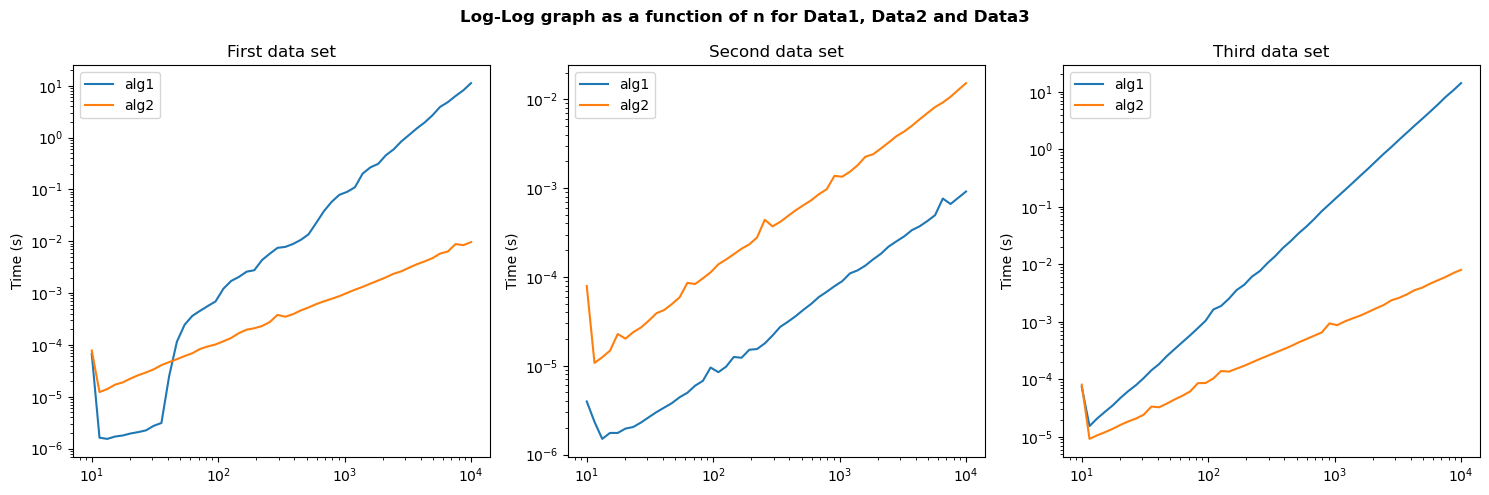

In [116]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax1.loglog(list_values, y_input1,label="alg1")
ax1.loglog(list_values, y_input2,label="alg2")
ax1.set_ylabel('Time (s)')
ax1.set_title('First data set')
ax1.legend()

ax2.loglog(list_values, y_inputB,label="alg1")
ax2.loglog(list_values, y_inputC,label="alg2")
ax2.set_ylabel('Time (s)')
ax2.set_title('Second data set')
ax2.legend()

ax3.loglog(list_values, y_inputD,label="alg1")
ax3.loglog(list_values, y_inputE,label="alg2")
ax3.set_ylabel('Time (s)')
ax3.set_title('Third data set')
ax3.legend()

fig.suptitle('Log-Log graph as a function of n for Data1, Data2 and Data3',fontweight ="bold")
fig.tight_layout()
plt.show()

#### Scaling performance compares across the three data sets. Which algorithm would you recommend to use for arbitrary data and why?

##### Comparing Alg1 & Alg2 for Data1
 - Data1 is a list of random numbers. From the graph we can see that the alg2 takes more time than alg1 on small dataset to sort the values. While on large datasets the alg2 works more efficiently i.e. thats less time to sort the values.

##### Comparing Alg1 & Alg2 for Data2
 - From the graph we can see that the alg2 takes more time than alg1 to sort the values irrespectively of the size of the data points. The data2 is a list of numbers in ascending order. So the list is alreday sorted. Alg1 works better on already sorted list. 

##### Comparing Alg1 & Alg2 for Data3
 - From the graph we can see that the alg1 takes more time than alg2 to sort the values irrespectively of the size of the data points. The data3 is in descending order which means that we would take time to sort the values in ascending order as it will have to reverse the order. In this case, alg2 is more efficient than alg1. 
 
 
Algorithm2 would be recommended to use for arbitrary data. In the first dataset we have a list of random numbers. For the the random number dataset Alg2 takes less time to sort the values. 

#### Explain in words how to parallelize alg2; that is, where are there independent tasks whose results can be combined?

#### Response 
 - We know that the alg2 uses MergeSort strategy to sort the values. Merge sort uses the intuition of recursion method.Merge sort is a divide and conquer algorithm. Given an input array, it divides it into halves and each half is then applied the same division method until individual elements are obtained. A pairs of adjacent elements are then merged to form sorted sublists until one fully sorted list is obtained.

 - We want merge sort to run on a parallel computing platform.The key to designing parallel algorithms is to find the operations that could be carried out simultaneously i.e we examine a known sequential algorithm and look for possible simultaneous operations.

 - We can parallelize the processing of left and right splits which are the independent tasks. We can assume we have an unlimited number of processors. Looking at the merge sort algorithm tree in the sequential algorithm we can try to assign simultaneous operations to separate processors which will work concurrently to do the dividing and merging at each level. After parallelization, use join() method before merging to ensure the left and right sublists are in order.
 
 - We can also use Parallel Quick Sort strategy. Parallel quick sort is very similar to parallel selection. We randomly pick a pivot and sort the input list into two sublists based on their order relationship with the pivot. However, instead of discarding one sublist, we continue this process recursively until the entire list has been sorted.

#### Using the multiprocessing module, provide a two-process parallel implementation of alg2 (4 points), compare its performance on data from the data1 function for moderate n (3 points), and discuss your findings (3 points).

#### Note : The code was run in a standalone file. .py file has been uploaded to the repository.

In [ ]:
import matplotlib.pyplot as plt
import multiprocessing 
from time import perf_counter
import numpy as np
from tqdm import tqdm

## Data as given the assignment 

def data1(n, sigma=10, rho=28, beta=8/3, dt=0.01, x=1, y=1, z=1):
    import numpy
    state = numpy.array([x, y, z], dtype=float)
    result = []
    for _ in range(n):
        x, y, z = state
        state += dt * numpy.array([
            sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z
        ])
        result.append(float(state[0] + 30))
    return result

## Algorithm which needs to be parallelized 

def alg2(data):
    if len(data) <= 1:
        return data
    else:
        split = len(data) // 2
        left = iter(alg2(data[:split])) # left data
        right = iter(alg2(data[split:])) # right data
        result = []
    # note: this takes the top items off the left and right piles
        left_top = next(left)
        right_top = next(right)
    # combining the left and right data
    while True:
        if left_top < right_top:
            result.append(left_top)
            try:
                left_top = next(left)
            except StopIteration:
            # nothing remains on the left; add the right + return
                return result + [right_top] + list(right)
        else:
            result.append(right_top)
            try:
                right_top = next(right)
            except StopIteration:
        # nothing remains on the right; add the left + return
                return result + [left_top] + list(left)


def parallel_alg2(data):
    if len(data) <= 1:
        return data
    else:
        split = len(data) // 2
        with multiprocessing.Pool() as p:   ##using multiprocessing to parallelize the two independent tasks
            [left, right] = p.map(alg2, [data[:split], data[split:]])
        left = iter(left)
        right = iter(right)
        # combining the left and right data
        result = []
        left_top = next(left)
        right_top = next(right)
        while True:
            if left_top < right_top:
                result.append(left_top)
                try:
                    left_top = next(left)
                except StopIteration:
            # nothing remains on the left; add the right + return
                return result + [right_top] + list(right)
            else:
                result.append(right_top)
                try:
                    right_top = next(right)
                except StopIteration:
        # nothing remains on the right; add the left + return
                return result + [left_top] + list(left)



if __name__ == '__main__':
    data_var = np.logspace(0, 23, base=2, dtype=int)
    duration = [] #time by the parallelized algo
    algo2d1time = [] #time by the unparallelized algo
    
    for n in tqdm(data_var):
        data_set = data1(n, sigma=10, rho=28, beta=8/3, dt=0.01, x=1, y=1, z=1)
        algo2d1_start = perf_counter()
        alg2(data_set)     ## time taken by the unparallelized algo
        algo2d1_stop= perf_counter()
        algo2d1time.append(algo2d1_stop - algo2d1_start)
        start_time = perf_counter()
        parallel_alg2(data_set)    #time taken by the parallelized algo
        stop_time = perf_counter()
        duration.append(stop_time - start_time)
        print(duration[-1],  algo2d1time[-1])
    plt.loglog(data_var, algo2d1time, label = "Unparallelized algo2")
    plt.loglog(data_var, duration, label = "Parallelized algo2")
    plt.title("Comparing two-process parallel implementation of algo2")
    plt.legend()
    plt.show()


In [1]:
from PIL import Image

In [17]:
try: 
    img  = Image.open("/Users/mahimakaur/Desktop/Computional Methods for Health Informatics/Parallelized.png") 
except IOError:
    pass

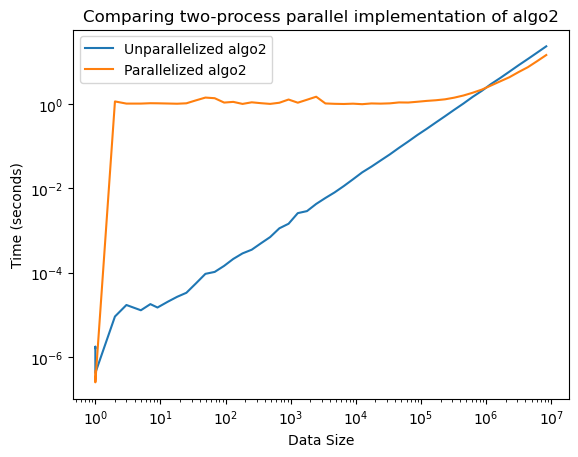

In [18]:
img

#### Findings : From the graph we can see the initially for small dataset the mergesort algorithms works faster and is more efficient. But as the dataset size increases to millions the parallelized algorithms takes less time to sort the values i.e. it works about 1.5 times faster than the usual mergesort. 